## Secrets in bilibili video covers:
    Work on the videos in the bilibili hot list to take insights into the connection between the thumbnail image styles and the genres of these videos!

### Work Flow:
Pictures ->(1) Feature Vectors ->(2) Dis/Similarity Matrix ->(3) Graph ->(4) Community ->(5) Visualization ->(6) Analysis

In [1]:
import feature
import palsgraph
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
import itertools
import warnings
import matplotlib.cbook
import numpy as np
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
# import area for every member to add their source code

In [2]:
# parameters
categories = ['animal','animation','dance','fashion','food','game','kichiku','knowledge','life','music','tech']
num_train_per_cat = 5
num_pictures = len(categories)*num_train_per_cat
data_path = './bilibili_img/'

#### (1）Siamese/CNN network
Input: pictures or their paths. Output: uncertain (Feature Vectors possibly).

In [3]:
# load data
image_paths,labels,genres = feature.get_image_paths(data_path, categories, num_train_per_cat)

# get feature vectors using different methods
features = feature.get_feature_hog(image_paths)   # using hog to extract 


#### (2) Covariance/ Euclidean Distance/Gaussian to get Dis/Similarity Matrix
Input: featurer vectors.Output: dis/simlarity matrix.

if step(1) has directly got the output, then jump to the next step.

In [4]:
# using Euclidean distance to calculate distance/similarity
distance = feature.get_distance(features,num_pictures) 

#### (3) Threshold or some other ways
Input: dis/similarity matrix.
Output: different ways to describe a graph.

some code in Kal's homework may help to find the appropriate threshold.(show the histogram of the data,and then test)

In [5]:
# homework code to visualize similarity matrix in histogram
#plt.figure(figsize=(15, 4))
#_ = plt.hist(squareform(distance), bins=200)

threshold = 19   # waiting to be tested
adjmat = feature.get_graph(distance,threshold)
feature.write_edgestxt(num_pictures,adjmat)   # write edges information into a txt file
# help to visualize graph for a simple look
#G = palsgraph.make_graph(adjmat, labels=labels, show_singletons=False)
#nx.draw(G, with_labels=True,font_size=10,font_color='darkslategray',edge_color='gray')
#linkages = linkage(squareform(distance), 'single')


#### (4) Different Community Detection Algorithms
Input: graph. Output: community in a graph

#### (5) Visualization
Input: community above. Output: different visualizations

In [6]:

edges = np.array([(str(x), str(y)) for (x, y) in np.genfromtxt('edges.txt', delimiter='\t', dtype=np.integer)])

# Convert the names of the vertices into matrix indices, and vice versa
idx2node = dict(list(enumerate(np.unique(edges.reshape(-1,)))))
node2idx = {str(v): k for k, v in idx2node.items()}

size = len(idx2node.keys())
adjmat = np.zeros((size, size))

for i in range(edges.shape[0]):
    adjmat[node2idx[edges[i,0]], node2idx[edges[i,1]]] = adjmat[node2idx[edges[i,1]], node2idx[edges[i,0]]] = 1
    
G = palsgraph.make_graph(adjmat, labels=labels, show_singletons=False)

In [7]:
from networkx.algorithms.community.centrality import girvan_newman

# girvan_newman
comp = girvan_newman(G)
communities = [c for c in itertools.islice(comp, 1)][0] # Get only the first communities discovered



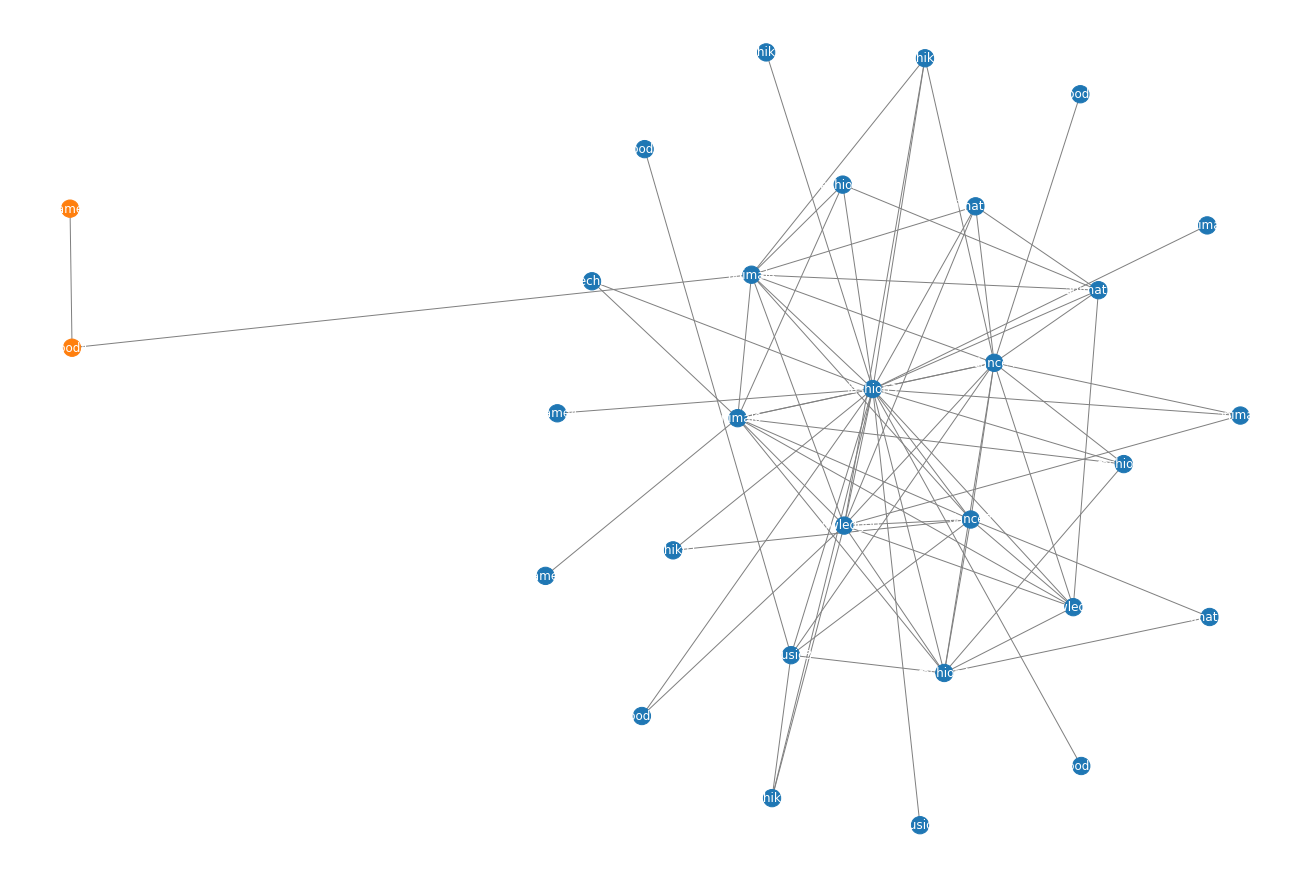

In [8]:

pos = palsgraph.getpos(G, communities)
color_map = palsgraph.gen_colormap(G, communities)
plt.figure(figsize=(18, 12))
nx.draw(G, pos=pos, with_labels=True, node_color=color_map, font_color='white', edge_color='grey')
plt.show()


In [9]:
import markov_clustering as mc

def restore_labels(communities, idx2node):
    _communities = []
    for community in communities:
        _communities.append([idx2node[idx] for idx in community])
    return _communities

matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix)
communities = mc.get_clusters(result)

communities = restore_labels(communities, idx2node)

In [ ]:
pos = palsgraph.getpos(G, communities)
color_map = palsgraph.gen_colormap(G, communities)
plt.figure(figsize=(18, 12))
nx.draw(G, pos=pos, with_labels=True, node_color=color_map, font_color='white', edge_color='grey')
plt.show()

#### (6) Analysis 
(I am not sure about whether this part needs any code or something else to help)